# Introduction

In this assignment, We analyse the LTI systems in continuous time using Laplace transform to find the solutions to the equations governing the system with the help of python tools like Symbolic python known as $Sympy$ and Signal toolbox.


# Procedure

## Part - 0

Importing necessary libraries

In [1]:
# importing necessary libraries
from __future__ import division
from sympy import *
import pylab as p
import scipy.signal as sp
import numpy as np

In [2]:
# creating the necessary symbols and initialize printing
s,w = symbols('s omega')
init_printing()

A function that takes the circuit parameters as arguments and solves the matrix equation A * b = V and returns the value of b array. This is for a Low pass Filter.

In [3]:
# function to return V(s) for a low pass filter
def lowpass(R1, R2, C1, C2, G, Vi):
    s = symbols('s')
    A = Matrix([[0, 0, 1, -1/G], [-1/(1+s*R2*C2), 1, 0, 0],
                [0, -G, G, 1], [-1/R1-1/R2-s*C1, 1/R2, 0, s*C1]])
    b = Matrix([0, 0, 0, Vi/R1])
    V = A.inv()*b
    return (A, b, V)

A function that takes the circuit parameters as arguments and solves the matrix equation for a High pass filter.

In [4]:
# function to return V(s) for a high pass filter
def highpass(R1,R2,C1,C2,G,Vi = 1):
    A = Matrix([[0,0,1,-1/G],[-1/(1+1/(s*R2*C2)),1,0,0],
                [0,-G,G,1],[-s*C1-s*C2-1/R1,s*C2,0,1/R1]])
    b = Matrix([0,0,0,Vi*s*C1])
    V = A.inv()*b
    return(A,b,V)


A Function which converts the equation formed using symbols to LTI for using the signal toolbox

In [5]:
def convertToLTI(V):
    h = fraction(V)
    num, den = poly(h[0], s), poly(h[1], s)
    n, d = num.all_coeffs(), den.all_coeffs()
    n, d = [float(f) for f in n], [float(f) for f in d]
    H = sp.lti(n, d)
    return H

## Part - 1 
For a given low pass filter, we try to find out the transfer function using the given circuit parameters by finding out V(s) and converting it into the LTI format.

Then we find the transfer function $H(s)$. For the transfer function we find out the step response, $V_i(t)$ = $u(t)$

Then for the same system we find the response to an input which is a summation of 2 sinusoids.
$$
v_i(t) = \sin(2000t)u(t) + \cos(10^6t)u(t)
$$

We find the response in laplace domain and then convert it to the time domain using the signal toolbox.

In [6]:
# Circuit 1
# Circuit parameters
R1 = 10**4
R2 = 10**4
C1 = 10**-11
C2 = 10**-11
G = 1.586

# Finding the value of H for a low pass filter with the given circuit parameters
A, b, V = lowpass(R1, R2, C1, C2, G, 1)
H_low = convertToLTI(expand(simplify(V[3]))) 

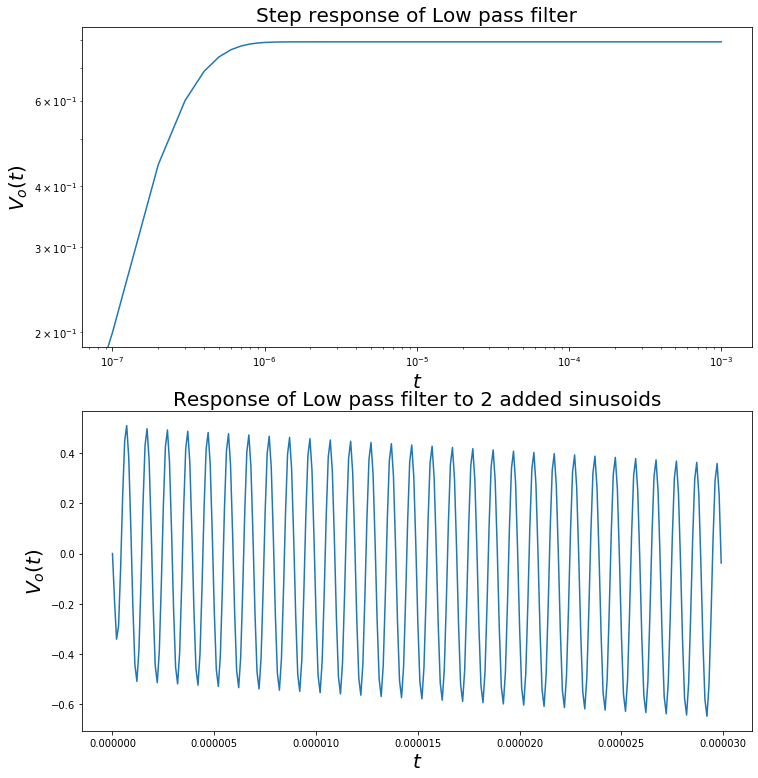

In [7]:
t = np.arange(0,1e-3,1e-7)

# using lsim from signal toolbox to find response to step input
t,v_o,svec = sp.lsim(H_low,np.ones_like(t),t)
fig1 = p.figure(figsize=(12,20))
ax1 = fig1.add_subplot(311)
# plotting the output in loglog scale
ax1.loglog(t, abs(v_o))
ax1.set_xlabel(r"$t$", size=20)
ax1.set_ylabel(r"$V_o(t)$", size=20)
ax1.set_title("Step response of Low pass filter", size=20)

# using lsim from signal toolbox to find response to input that is a
# summation of 2 sinusoids with different frequency
t,v_o_2,svec = sp.lsim(H_low,(np.sin(2000*np.pi*t)+np.cos(2*10**6*np.pi*t)),t)
ax2 = fig1.add_subplot(312)
# plotting the output for small values of time
ax2.plot(t[0:300], v_o_2[0:300])
ax2.set_xlabel(r"$t$", size=20)
ax2.set_ylabel(r"$V_o(t)$", size=20)
ax2.set_title("Response of Low pass filter to 2 added sinusoids", size=20)
p.show()

## Part - 2

For a given High pass filter, we try to find out the transfer function using the given circuit parameters by finding out V(s) and converting it into the LTI format.

Then we find the transfer function $H(s)$. For the transfer function we find out the step response, $V_i(t)$ = $u(t)$

Then for the same system we find the response to an input which is a summation of 2 sinusoids.<br>

$$v_i(t) = \sin(2000t)u(t) + \cos(10^6t)u(t)$$

We find the response in frequency domain and convert it in time domain using the signal toolbox.

In [8]:
# Circuit 2
R1 = 10**4
R2 = 10**4
C1 = 10**-9
C2 = 10**-9
G = 1.586
A, b, V = highpass(R1, R2, C1, C2, G, 1)
H_high = convertToLTI(expand(simplify(V[3])))

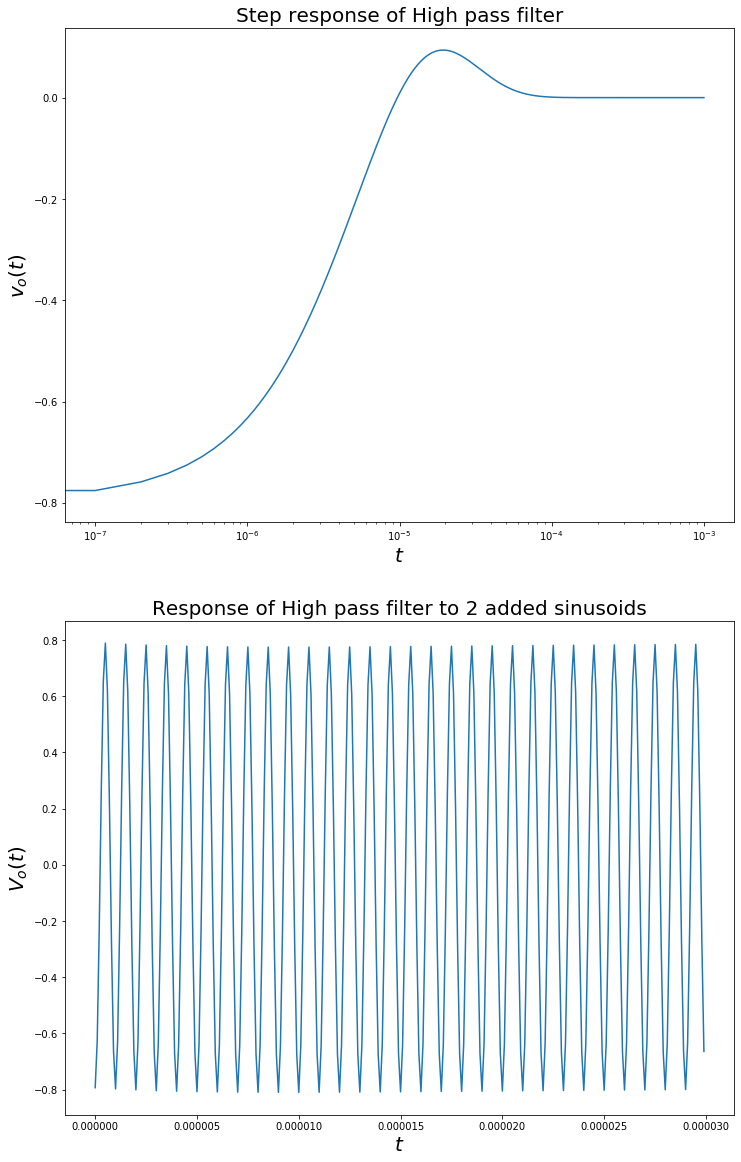

In [9]:
# using lsim from signal toolbox to find response to input that is a
# summation of 2 sinusoids with different frequency
t,v_o_3,svec = sp.lsim(H_high,np.ones_like(t),t)
fig2 = p.figure(figsize = (12, 20))
ax3 = fig2.add_subplot(211)
# plotting the output in semilog scale
ax3.semilogx(t, v_o_3)
ax3.set_xlabel(r"$t$", size=20)
ax3.set_ylabel(r"$v_o(t)$", size=20)
ax3.set_title("Step response of High pass filter", size=20)

# using lsim from signal toolbox to find response to input that is a
# summation of 2 sinusoids with different frequency
t,v_o_4,svec = sp.lsim(H_high,(np.sin(2000*np.pi*t)+np.cos(2*10**6*np.pi*t)),t)
ax4 = fig2.add_subplot(212)
# plotting the output for small values of time
ax4.plot(t[0:300], v_o_4[0:300])
ax4.set_xlabel(r"$t$", size=20)
ax4.set_ylabel(r"$V_o(t)$", size=20)
ax4.set_title("Response of High pass filter to 2 added sinusoids", size=20)
p.show()

## Part - 3

For a damped sinusoid of low frequency as input we find the response of it from both the filter<br><br>
$$V_i(t) = sin(2000t)e^{-100t}u(t)$$
<br>The frequency of this sinusoid is low. We plot the graph of the response in time domain for both the filters.

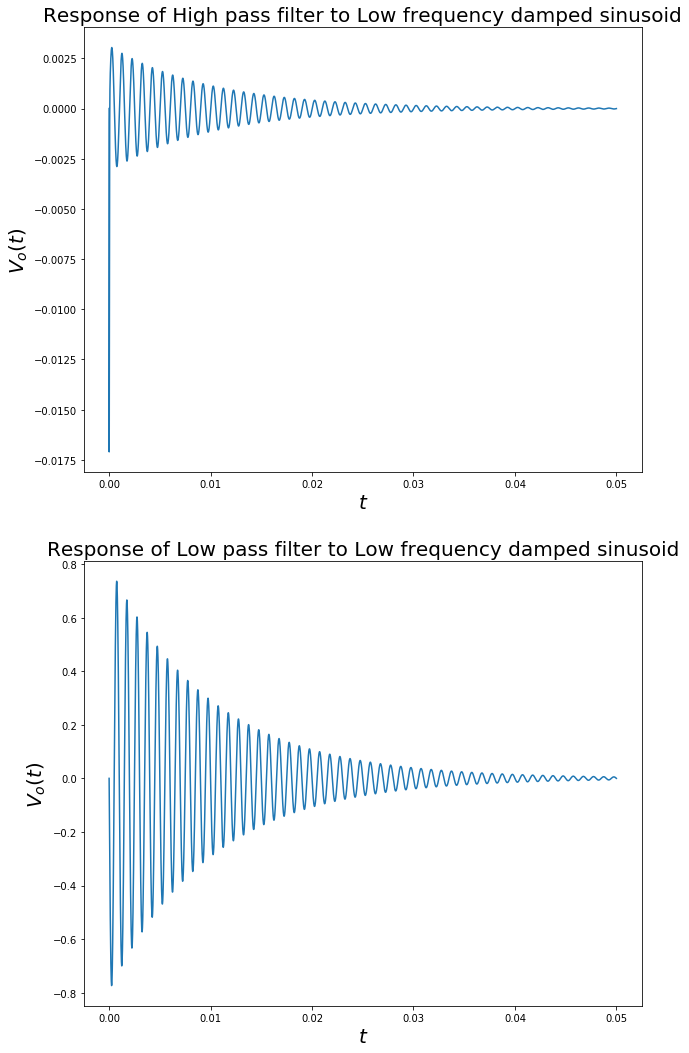

In [10]:
damp = 100
t = np.arange(0,5*1e-2,1e-7)
# finding the output of the high pass filter for a damped sinusoid of low frequency
t,v_o_5,svec = sp.lsim(H_high, np.exp(-damp*t)*(np.sin(2000*np.pi*t)),t)
fig3 = p.figure(figsize=(10,18))
ax5 = fig3.add_subplot(211)
# plotting the output
ax5.plot(t, v_o_5)
ax5.set_xlabel(r"$t$", size=20)
ax5.set_ylabel(r"$V_o(t)$", size=20)
ax5.set_title("Response of High pass filter to Low frequency damped sinusoid", size=20)

# finding the output of the low pass filter for a damped sinusoid of low frequency
t,v_o_5,svec = sp.lsim(H_low, np.exp(-damp*t)*(np.sin(2000*np.pi*t)),t)
ax6 = fig3.add_subplot(212)
# plotting the output
ax6.plot(t, v_o_5)
ax6.set_xlabel(r"$t$", size=20)
ax6.set_ylabel(r"$V_o(t)$", size=20)
ax6.set_title("Response of Low pass filter to Low frequency damped sinusoid", size=20)
p.show()

## Part - 4

For a damped sinusoid of high frequency as input we find the response of it from both the filter
$$V_i(t) = cos(10^6t)e^{-100t}u(t)$$
The frequency of sinusoid is high. We plot the graph of the response in time domain for both the filters.

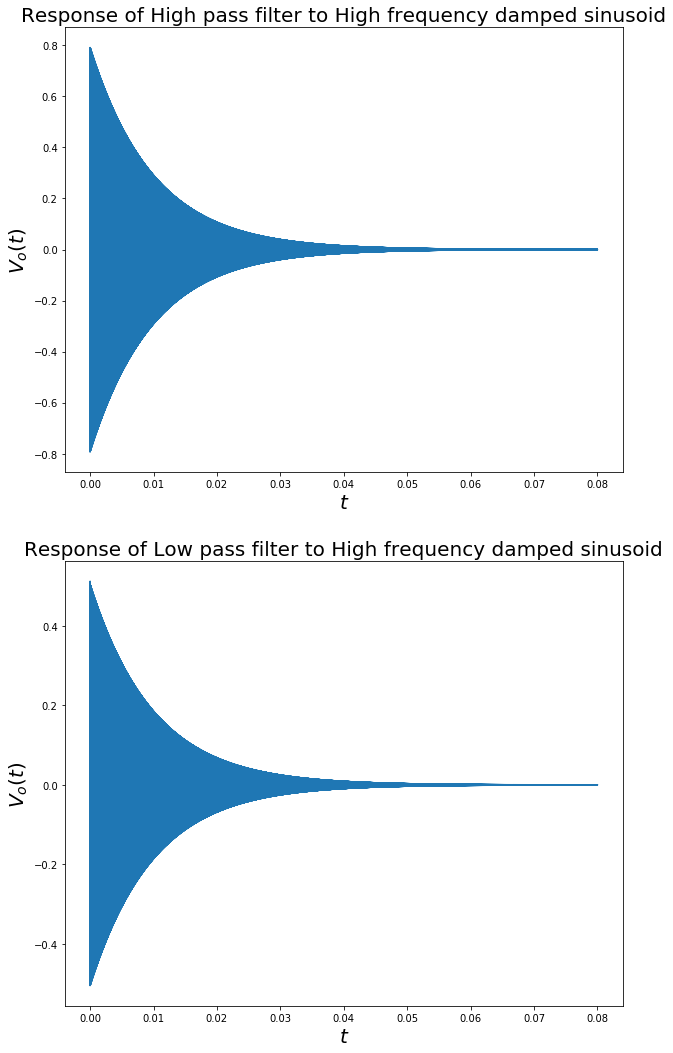

In [11]:
t = np.arange(0,8*1e-2,1e-7)

# finding the output of the high pass filter for a damped sinusoid of high frequency
t,v_o_7,svec = sp.lsim(H_high, np.exp(-damp*t)*(np.cos(2*10**6*np.pi*t)),t)
fig4 = p.figure(figsize=(10,18))
ax7 = fig4.add_subplot(211)
# plotting the output
ax7.plot(t, v_o_7)
ax7.set_xlabel(r"$t$", size=20)
ax7.set_ylabel(r"$V_o(t)$", size=20)
ax7.set_title("Response of High pass filter to High frequency damped sinusoid", size=20)

# finding the output of the high pass filter for a damped sinusoid of high frequency
t,v_o_8,svec = sp.lsim(H_low, np.exp(-damp*t)*(np.cos(2*10**6*np.pi*t)),t)
ax8 = fig4.add_subplot(212)
# plotting the output
ax8.plot(t, v_o_8)
ax8.set_xlabel(r"$t$", size=20)
ax8.set_ylabel(r"$V_o(t)$", size=20)
ax8.set_title("Response of Low pass filter to High frequency damped sinusoid", size=20)
p.show()

# Conclusion

1. The low frequency sinusoid when passed through a high pass filter show much faster decay as compared to the low pass filter. This is because, the High pass filter acts in a damping fashion for low frequency sinusoid.<br><br>

2. As expected of it the Low pass filter allows only low frequencies to pass, while the high pass filter allows only high frequencies to pass.<br><br>

3. An overshoot appears in the step response of a High pass filter, whereas there is none in a Low pass filter. This is because they are sensitive to >2nd order filters.